# Presentation of models trained to predict players' wages in the FIFA 23 game

# Importing libraries and dataset

In [1]:
# 1. Import basic libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import plotly.express as px

In [2]:
# 2. Read and transform dataframe
def read_csv(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # Create a new Count Nationality column
    df['Nationality Count'] = df.groupby('Nationality')['Nationality'].transform('count')

    # Group together countries with less than 300 players
    mask_nation = df['Nationality Count'] < 300
    df.loc[mask_nation, 'Nationality'] = 'Other'
    df = df.drop(columns = 'Nationality Count')
    
    return df

In [3]:
# 3. Read data file
df = read_csv('/Fifa_23_Players_Data.csv') # dataset needs to be uploaded as Fifa_23_Players_Data.csv
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


# Analysys of the dataset and aplication of necessary transformations

In [4]:
# 1. Basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [5]:
# 2. Describe overall
df.describe().round(decimals=0)

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,...,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0,18539.0
mean,66.0,71.0,2875461.0,25.0,182.0,75.0,1602.0,358.0,8825.0,5081688.0,...,58.0,57.0,58.0,56.0,56.0,56.0,56.0,55.0,56.0,23.0
std,7.0,6.0,7635129.0,5.0,7.0,7.0,273.0,40.0,19461.0,14672035.0,...,14.0,13.0,14.0,14.0,14.0,14.0,14.0,15.0,14.0,15.0
min,47.0,48.0,0.0,16.0,155.0,49.0,759.0,224.0,0.0,0.0,...,18.0,18.0,18.0,17.0,19.0,17.0,17.0,18.0,17.0,10.0
25%,62.0,67.0,475000.0,21.0,177.0,70.0,1470.0,331.0,1000.0,665000.0,...,54.0,53.0,54.0,51.0,48.0,51.0,49.0,45.0,49.0,17.0
50%,66.0,71.0,1000000.0,25.0,182.0,75.0,1640.0,358.0,3000.0,1500000.0,...,62.0,60.0,62.0,59.0,59.0,59.0,59.0,58.0,59.0,18.0
75%,70.0,75.0,2000000.0,29.0,186.0,80.0,1786.0,385.0,8000.0,3400000.0,...,67.0,66.0,67.0,66.0,66.0,66.0,65.0,66.0,65.0,20.0
max,91.0,95.0,190500000.0,44.0,206.0,105.0,2312.0,502.0,450000.0,366700000.0,...,92.0,91.0,92.0,88.0,89.0,88.0,87.0,90.0,87.0,90.0


In [6]:
# 3. Checking the shape of Data Frame
df.shape

(18539, 89)

In [7]:
# 4. Check whether the is any null values
print(df.isnull().sum())
print(f'Total null value count:{df.isnull().sum().sum()}')

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64
Total null value count:0


In [8]:
# 5. Looking into Nationality feature
print(f'Nationality feature has {df["Nationality"].nunique()} unique values')

Nationality feature has 21 unique values


In [9]:
# 6. Count value per Nationality
df_nationality_counts = df["Nationality"].value_counts()
df_nationality_counts

Other                  6527
England                1632
Germany                1204
Spain                  1074
France                  963
Argentina               937
Brazil                  728
Italy                   623
China PR                439
United States           437
Netherlands             428
Poland                  390
Sweden                  390
Republic of Ireland     385
Portugal                382
Norway                  373
Romania                 341
Saudi Arabia            331
Korea Republic          319
Belgium                 318
Denmark                 318
Name: Nationality, dtype: int64

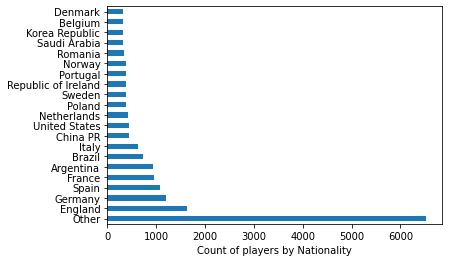

In [10]:
# 7. Plot the count of players
df_nationality_counts.plot(kind="barh")
plt.xlabel("Count of players by Nationality");

In [11]:
# 8. Perform one-hot encoding on columns
one_hot_df = pd.get_dummies(df,
                            columns = ['Nationality', 'Best Position', 'Attacking Work Rate', 'Defensive Work Rate'],
                            prefix = ['Country', 'Best_Position', 'Attacking_Work_Rate', 'Defensive_Work_Rate'])

one_hot_df['Preferred Foot'] = 1.0 * (df['Preferred Foot'] == 'Right')
print(one_hot_df)

             Known As           Full Name  Overall  Potential  Value(in Euro)  \
0            L. Messi        Lionel Messi       91         91        54000000   
1          K. Benzema       Karim Benzema       91         91        64000000   
2      R. Lewandowski  Robert Lewandowski       91         91        84000000   
3        K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4           K. Mbappé       Kylian Mbappé       91         95       190500000   
...               ...                 ...      ...        ...             ...   
18534      D. Collins      Darren Collins       47         56          110000   
18535    Yang Dejiang        Dejiang Yang       47         57           90000   
18536       L. Mullan         Liam Mullan       47         67          130000   
18537    D. McCallion    Daithí McCallion       47         61          100000   
18538        N. Rabha         Nabin Rabha       47         50           60000   

      Positions Played     

In [12]:
target = "Wage(in Euro)"
features = []
for feature in one_hot_df.columns:
    if feature not in ["Wage(in Euro)", "Known As", "Full Name", "Image Link",
                       "Club Name", "Club Jersey Number", "National Team Name",
                       "National Team Image Link",  "National Team Jersey Number",
                       "Contract Until", "Joined On", "Positions Played",
                       "Club Position", "National Team Position", "On Loan", "Preferred Foot"]:
        features.append(feature)
print(len(features))
print(features)
y = df[target]
X = one_hot_df[features]

111
['Overall', 'Potential', 'Value(in Euro)', 'Age', 'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats', 'Release Clause', 'Weak Foot Rating', 'Skill Moves', 'International Reputation', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating', 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating', 'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating', 'CDM Rating', 'RWB Rating', 'LB

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14831, 111)
y_train shape: (14831,)
X_test shape: (3708, 111)
y_test shape: (3708,)


# Training of predictive models

## Training of a naive average model

The first model predicts the average value of the training dataset and we use it as a baseline for more sophisticated models.

The predected average value is equal to 8895.02.

This model achieves mean absolute error equal to 9846.17 and mean squared equal to 385673057.09 on the training set and mean absolute error equal to 9564.98 and mean squared equal to 350793716.95 on the test set.

In [14]:
# 1. Create a naive average model
y_mean = y_train.mean()
y_pred_baseline_train = [y_mean] * len(y_train)
y_pred_baseline_test = [y_mean] * len(y_test)
print("Mean apt price: ", round(y_mean, 2))

mse_training_baseline = round(mean_squared_error(y_train, y_pred_baseline_train), 2)
mae_training_baseline = round(mean_absolute_error(y_train, y_pred_baseline_train), 2)
print("Training MAE: ", mae_training_baseline)
print("Training MSE: ", mse_training_baseline)

mse_test_baseline = round(mean_squared_error(y_test, y_pred_baseline_test), 2)
mae_test_baseline = round(mean_absolute_error(y_test, y_pred_baseline_test), 2)
print("Test MAE: ", mae_test_baseline)
print("Test MSE: ", mse_test_baseline)

Mean apt price:  8895.02
Training MAE:  9846.17
Training MSE:  385673057.09
Test MAE:  9564.98
Test MSE:  350793716.95


## Training of a linear regression model

The second model performs the linear regression. We fit the model on the training set and evaluate on the test set

The linear model achieves mean absolute error equal to 4796.46 and mean squared equal to 98984826.08 on the training set and mean absolute error equal to 4720.74 and mean squared equal to 92139082.12 on the test set.

In [15]:
# 1. Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# 2. Evaluate the linear model performance on training data
y_pred_training = model.predict(X_train)

mse_training_linear = mean_squared_error(y_train, y_pred_training)
print("Training MSE: ", round(mse_training_linear, 2))

mae_training_linear = mean_absolute_error(y_train, y_pred_training)
print("Training MAE: ", round(mae_training_linear, 2))

Training MSE:  98984826.08
Training MAE:  4796.46


In [17]:
# 3. Evaluate the linear model performance on test data
y_pred_test = pd.Series(model.predict(X_test))

mse_test_linear = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", round(mse_test_linear, 2))

mae_test_linear = mean_absolute_error(y_test, y_pred_test)
print("Test MAE: ", round(mae_test_linear, 2))

Test MSE:  92139082.12
Test MAE:  4720.74


## Training of a random forest regressor

The last model is a random forest regressor. Similarly, we fit the model on the training set and evaluate on the test set

The random forest model achieves mean absolute error equal to 1416.14 and mean squared equal to 11674281.56 on the training set and mean absolute error equal to 3663.75 and mean squared equal to 75408844.11 on the test set.

In [18]:
# 1. Create a random forest regressor
forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [19]:
# 2. Evaluate the random forest classifier performance on training data
y_pred_training = forest_reg.predict(X_train)

mse_training_forest = mean_squared_error(y_train, y_pred_training)
print("Training MSE: ", round(mse_training_forest, 2))

mae_training_forest = mean_absolute_error(y_train, y_pred_training)
print("Training MAE: ", round(mae_training_forest, 2))

Training MSE:  11674281.56
Training MAE:  1416.14


In [20]:
# 3. Evaluate the random forest classifier  performance on test data
y_pred_test = pd.Series(forest_reg.predict(X_test))

mse_test_forest = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", round(mse_test_forest, 2))

mae_test_forest = mean_absolute_error(y_test, y_pred_test)
print("Test MAE: ", round(mae_test_forest, 2))

Test MSE:  75408844.11
Test MAE:  3663.75


# Summary

As we expected, the baseline model perform the worst of these three models both in MSE and MAE metric.

The random forest regressor performed better than the linear model in both metrics, although we observe huge difference in these metrics between performances of the random forest regressor on the training set and the test set.
This might suggest that the random forest regressor is actually overfitting a lot

## Plots

In [21]:
MSE_training = pd.DataFrame({'model_name': ['average', 'linear', 'random_forest'], 'value': [mse_training_baseline, mse_training_linear, mse_training_forest]})
fig = px.bar(MSE_training, x='model_name', y='value', title = 'MSE on the training set', labels = {'model_name': 'Model', 'value': 'MSE'})
fig.show()

In [22]:
MAE_training = pd.DataFrame({'model_name': ['average', 'linear', 'random_forest'], 'value': [mae_training_baseline, mae_training_linear, mae_training_forest]})
fig = px.bar(MSE_training, x='model_name', y='value', title = 'MAE on the training set', labels = {'model_name': 'Model', 'value': 'MAE'})
fig.show()

In [23]:
MSE_test = pd.DataFrame({'model_name': ['average', 'linear', 'random_forest'], 'value': [mse_test_baseline, mse_test_linear, mse_test_forest]})
fig = px.bar(MSE_test, x='model_name', y='value', title = 'MSE on the test set', labels = {'model_name': 'Model', 'value': 'MSE'})
fig.show()

In [24]:
MAE_test = pd.DataFrame({'model_name': ['average', 'linear', 'random_forest'], 'value': [mae_test_baseline, mae_test_linear, mae_test_forest]})
fig = px.bar(MSE_training, x='model_name', y='value', title = 'MAE on the test set', labels = {'model_name': 'Model', 'value': 'MAE'})
fig.show()